# 선형 회귀(Linear Regression)
- knn 최근접 이웃 회귀: 사례기반(데이터)학습
- 선형 회귀: 모델 기반 학습
- 선형회귀는 널리 사용되는 대표적 회귀 알고리즘
- 비교적 간단하고 성능이 뛰어나기 때문에 맨 처음 배우는 머신러닝 알고리즘 중 하나
- 선형 함수를 이용하여 최적의 직선을 그리고 예측하는 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state= 42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
# 선형회귀 알고리즘
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 학습
lr.fit(train_input, train_target)

# 50cm 생선의 무게 예측
# 회귀방정식 y = ax + b
print(lr.predict([[50]]))
# a, b
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


In [5]:
# 결정계수
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


- 과대적합
- 훈련데이터에 모델의 성능이 뛰어난 반면 테스트 데이터의 성능이 떨어진다.

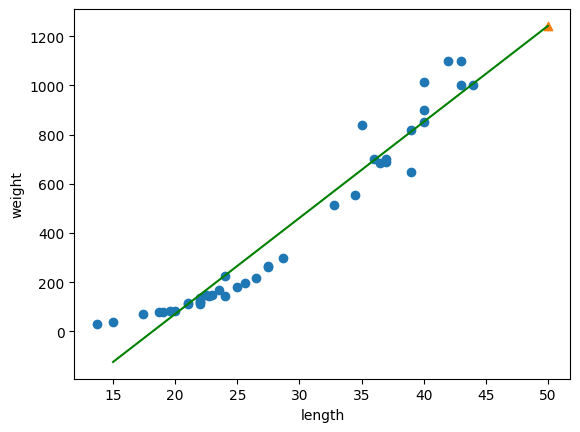

In [6]:
# 훈련세트의 산점도 그래프
plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]]), marker = '^')
# 선형회귀선
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_], color = 'g')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 1차보다 2차방정식이 맞는거같다.

- 최적의 직선이 아닌 최적의 곡선을 찾아내는 다항회귀를 구현해야 한다.
- 다항회귀식: y = ax^2 + bx + c
- 다항회귀를 구현하기 위헤 길이에 제곱한 항이 하나 필요하다.


In [7]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))


In [8]:
train_poly.shape

(42, 2)

In [9]:
# train_poly를 이용한 선형회귀 모델
lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.predict([[50 ** 2, 50]])

array([1573.98423528])

In [10]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


무게 = 1.01 * 길이^2 - 21.55 *길이 + 116.05

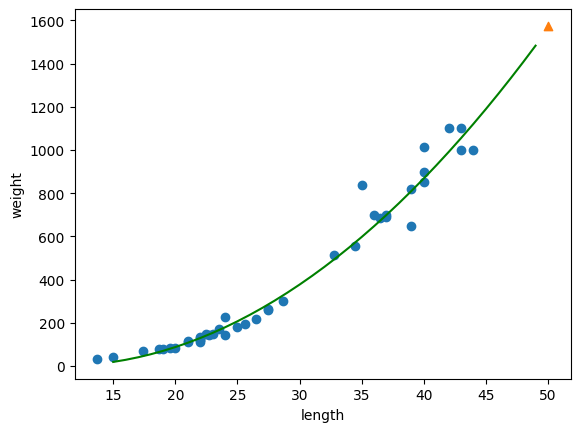

In [11]:
# 곡선을 표현하기 위해 작은 선들을 이어붙이는 작업을 수행한다.
point = np.arange(15, 50)

# 훈련세트의 산점도 그래프
plt.scatter(train_input, train_target)
plt.scatter(50, 1574 , marker = '^')

plt.plot(point , 1.01*point**2 - 21.6*point + 116.05, color = 'g')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
# 결정계수
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 확인학습

- 유방암 진단 데이터셋
- 유방암 진단 사진으로부터 측정한 종양(tumor의 특정값을 사용하여 종양이 양성(bengin)인지 악성(malignant)인지를 판별하는 데이터)

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

train_input, test_input, train_target, test_target = train_test_split(
    cancer.data, cancer.target, stratify= cancer.target, random_state= 66
)



# 특성공학과 규제
- 다중회귀: 여러 개의 특성을 사용한 선형 회귀 알고리즘
- 특성공학: 기존의 특성을 사용해 새로운 특성을 뽑아내는 것

## 다중 회귀

- 다중회귀란 여러 개의 특성(독립변수)를 사용한 선형회귀
- 1개의 특성은 직선, 2개의 특성 평면을 통해 학습
- 특성이 많다면 매우 복잡한 모델이 표현될 가능성이 높다.

**특성 공학**
- 각각의 특성을 제곱하고, 특성끼리 곱하는 등 기존의 특성으로 새로운 특성을 뽑아내는 작업

**차원 축소(PCA)**
- 너무 많은 특성을 가진 데이터셋을 이용하여 분석이 어려울 경우 중요한 특성을 이용하여 분석하는 주성분 분석과 함께 사용되며, 특성을 축약해 데이터를 분석하는 것

 ## 데이터 준비
 - 데이터: https://bit.ly/perch_csv

In [14]:
df = pd.read_csv('https://bit.ly/perch_csv')
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [15]:
raw = df.to_numpy() # 데이터프레임을 2차원 배열로 읽어와야 분석이 가능하다
raw

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

- 생선의 길이, 높이, 두께를 이용한 회귀분석

In [16]:
# target data(카톡으로 받았음)
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

## 훈련세트와 테스트세트로 분리

In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(raw, weight, random_state=42)

**사이킷런 변환기**
- 변환기(transform)
- 일반적인 머신러닝 알고리즘은 fit(), predict(), score()
- 전처리용으로 사용하는 특성공학과 관련된 알고리즘 fit(), transform()


In [18]:
# 다항식 변환기
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures: 현재 데이터를 다항식의 형태로 변경하는 역할을 수행하는 객체

In [19]:
# 2와 3이라는 두개의 특성을 이용해서 특성공학을 수행
poly = PolynomialFeatures(include_bias=False)
# fit_transform()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


**회귀방정식**
y = ax + b

**다중회귀방정식**
- a: 길이, b: 높이, c: 두께
- y = w1x1 + w2x2 + w3x3 + 1

In [20]:
raw.shape

(56, 3)

In [21]:
train_input.shape

(42, 3)

In [22]:
poly = PolynomialFeatures(include_bias=False)
# fit_transform()
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

- a, b, c
- a*a, b*b, c*c, a*b, a*c, b*c
그래서 위가 3에서 9가 된것

In [23]:
# 특성공학을 통해 추출된 특성의 생성내용을 확인할 수 있다.
## 컬럼명 추출
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [24]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [26]:
lr.score(train_poly, train_target)

0.9903183436982125

In [27]:
lr.score(test_poly, test_target)

0.9714559911594111

- 훈련데이터의 평가점수가 테스트데이터보다 높다. 즉, 과대적합이 발생되었음을 알 수 있다.

In [31]:
# degree 옵셥을 통해 특성의 객체에 3제곱, 4제곱... 수행할 수 있다.
poly = PolynomialFeatures(degree= 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [29]:
lr.fit(train_poly, train_target)

LinearRegression()

In [30]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


- 특성의 개수가 늘어나면 선형회귀모델은 강력해진다. 훈련데이터의 평가점수를 통해서 알 수 있다.
- 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

**선형회귀 모델의 과대적합(Overfitting)을 해결하는 방법**
- 특성(feature)의 갯수 줄이기
- 정규화 수행

**선형회귀 모델의 규제를 제약하는 모델**
- 릿지 회귀(Ridge Regression) 모델 : 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘 회귀(Lasso Regression) 모델 : 계수의 절대값을 기준으로 규제 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있어서 일반적으로 릿지를 조금 더 선호한다.
- alpha : 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절하는 하이퍼파라미터
- alpha 값이 크면 규제 강도가 높아지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.
- 하이퍼파라미터(Hyperparameter) : 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터

In [32]:
# 평균과 표준편차를 이용하여 특성의 스케일을 표준점수로 변경
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지회귀

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [37]:
# 최적의 alpha을 찾는 작업
# 훈련세트와 테스트세트의 평가 점수가 가장 가까운 지점이 최적의 alpha가 된다.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for a in alpha_list:
    # 릿지모델
    ridge = Ridge(alpha = a)
    # 훈련
    ridge.fit(train_scaled, train_target)
    # 결정계수
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

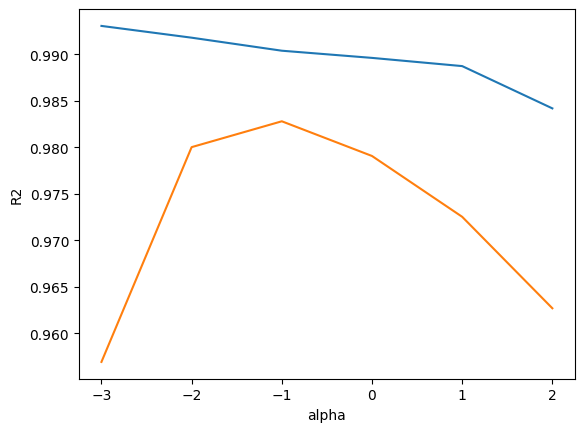

In [38]:
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_score)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘회귀


In [43]:
# 최적의 alpha을 찾는 작업
# 훈련세트와 테스트세트의 평가 점수가 가장 가까운 지점이 최적의 alpha가 된다.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for a in alpha_list:
    # 릿지모델
    lasso = Lasso(alpha = a)
    # 훈련
    lasso.fit(train_scaled, train_target)
    # 결정계수
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))


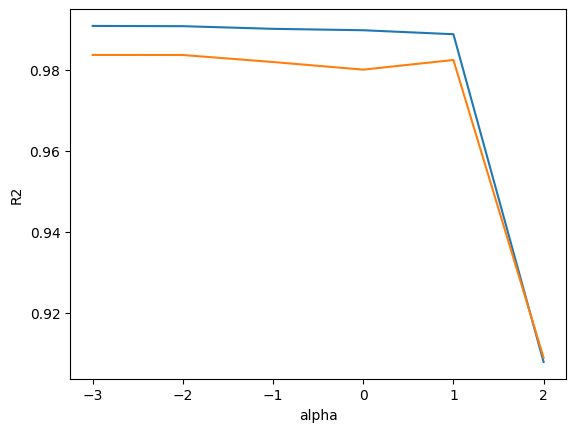

In [44]:
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_score)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883
